<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Statistics_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

In [6]:
library(ggplot2)
library(dplyr)
data(msleep)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
glimpse(msleep)

Rows: 83
Columns: 11
$ name         <chr> "Cheetah", "Owl monkey", "Mountain beaver", "Greater shor…
$ genus        <chr> "Acinonyx", "Aotus", "Aplodontia", "Blarina", "Bos", "Bra…
$ vore         <chr> "carni", "omni", "herbi", "omni", "herbi", "herbi", "carn…
$ order        <chr> "Carnivora", "Primates", "Rodentia", "Soricomorpha", "Art…
$ conservation <chr> "lc", NA, "nt", "lc", "domesticated", NA, "vu", NA, "dome…
$ sleep_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5…
$ sleep_rem    <dbl> NA, 1.8, 2.4, 2.3, 0.7, 2.2, 1.4, NA, 2.9, NA, 0.6, 0.8, …
$ sleep_cycle  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, N…
$ awake        <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 1…
$ brainwt      <dbl> NA, 0.01550, NA, 0.00029, 0.42300, NA, NA, NA, 0.07000, 0…
$ bodywt       <dbl> 50.000, 0.480, 1.350, 0.019, 600.000, 3.850, 20.490, 0.04…


In [8]:
mean(msleep$sleep_total)

[1] 10.43373

In [9]:
median(msleep$sleep_total)

[1] 10.1

In [14]:
msleep %>% count(sleep_total, sort = TRUE) %>% head(5)

sleep_total,n
<dbl>,<int>
12.5,4
10.1,3
5.3,2
6.3,2
8.4,2


In [15]:
# Used in categorical variables
msleep %>% count(vore, sort = TRUE)

vore,n
<chr>,<int>
herbi,32
omni,20
carni,19
NA,7
insecti,5


In [16]:
msleep %>%
  filter(vore == "insecti") %>%
  summarize(mean_sleep = mean(sleep_total),
            median_sleep = median(sleep_total))

mean_sleep,median_sleep
<dbl>,<dbl>
14.94,18.1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



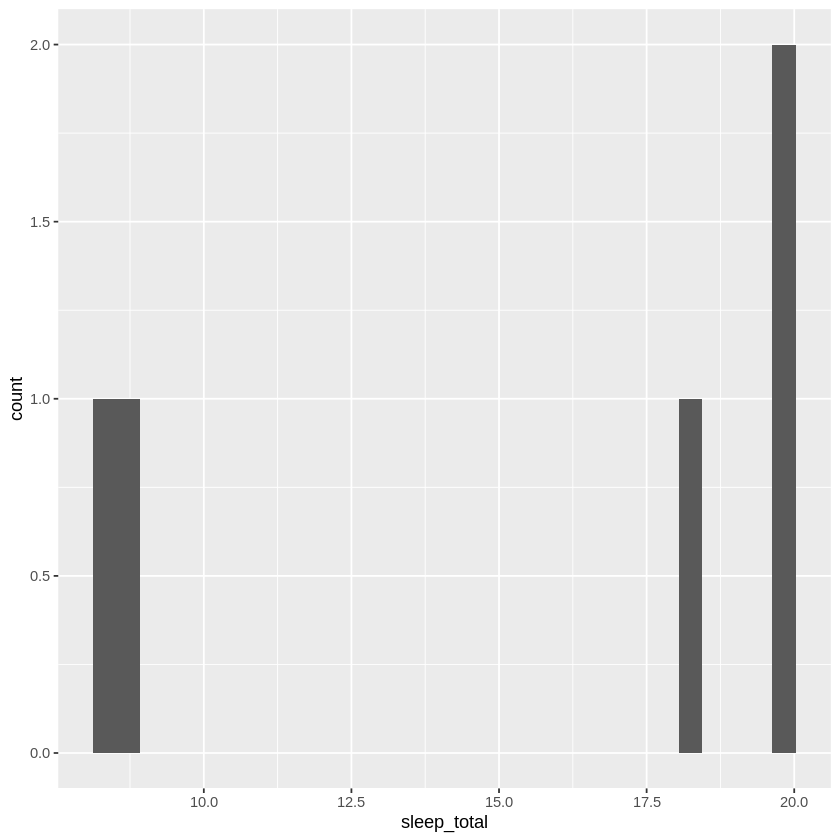

In [17]:
msleep %>%
  filter(vore == "insecti") %>%
  ggplot(aes(sleep_total)) +
    geom_histogram()

In [18]:
var(msleep$sleep_total)

[1] 19.80568

In [19]:
sd(msleep$sleep_total)

[1] 4.450357

In [20]:
mad(msleep$sleep_total)

[1] 5.04084

In [21]:
quantile(msleep$sleep_total)

0%   25%   50%   75%  100% 
 1.90  7.85 10.10 13.75 19.90

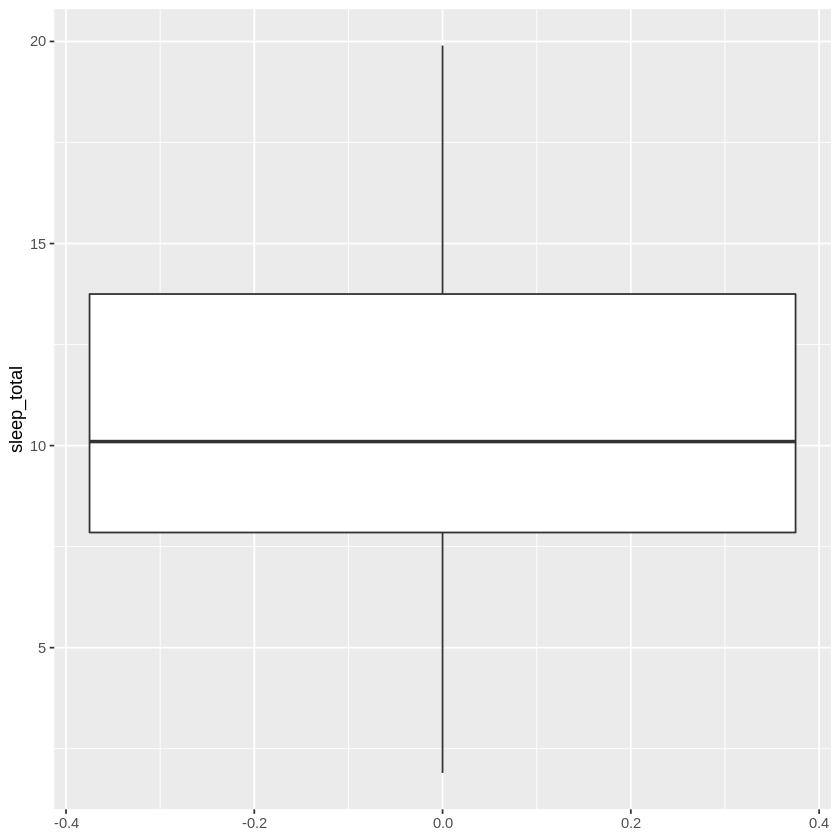

In [22]:
ggplot(msleep, aes(y = sleep_total)) +
  geom_boxplot()

In [23]:
quantile(msleep$sleep_total, probs = c(0, 0.2, 0.4, 0.6, 0.8, 1))

0%   20%   40%   60%   80%  100% 
 1.90  6.24  9.48 11.14 14.40 19.90

In [24]:
seq(0, 1, 0.2)

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [26]:
# IQR
quantile(msleep$sleep_total, 0.75) - quantile(msleep$sleep_total, 0.25)

75% 
5.9

In [28]:
# Finding Outliers
iqr <- quantile(msleep$bodywt, 0.75) - quantile(msleep$bodywt, 0.25)

lower_threshold <- quantile(msleep$bodywt, 0.25) - 1.5*iqr 
upper_threshold <- quantile(msleep$bodywt, 0.75) + 1.5*iqr 

msleep %>%
  filter(bodywt < lower_threshold | bodywt > upper_threshold) %>%
  select(name, vore, sleep_total, bodywt) %>%
  head(5) # outliers

name,vore,sleep_total,bodywt
<chr>,<chr>,<dbl>,<dbl>
Cow,herbi,4.0,600.000
Asian elephant,herbi,3.9,2547.000
Horse,herbi,2.9,521.000
Donkey,herbi,3.1,187.000
Giraffe,herbi,1.9,899.995
